# Travel Tide customer segmentation 

in this part of analysis , i upload a generated data from sql code to python to apply k-mean method 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set the ggplot style 
plt.style.use('ggplot')

# Load the dataset
df = pd.read_csv('traveltidefinal.csv')

In [2]:
df.shape

(5998, 15)

# check null values

In [3]:
df.isna().sum()

user_id                          0
age                              0
gender                           0
married                          0
has_children                     0
total_sessions                   0
total_flights_booked             0
total_hotels_booked              0
total_cancellations              0
average_flight_discount       1326
discount_flight_proportion       0
avg_hotel_discount               0
avg_base_fare_usd              818
scaled_ads_per_km             1962
total_checked_bags             818
dtype: int64

In [4]:
df.head()

,user_id,age,gender,married,has_children,total_sessions,total_flights_booked,total_hotels_booked,total_cancellations,average_flight_discount,discount_flight_proportion,avg_hotel_discount,avg_base_fare_usd,scaled_ads_per_km,total_checked_bags
0,23557,64,F,1,0,8,0,2,0,NaN,0.000,0.250,NaN,NaN,NaN
1,94883,51,F,1,0,8,2,2,0,NaN,0.000,0.125,432.045,NaN,1.0
2,101486,50,F,1,1,8,1,2,0,0.075,0.250,0.000,189.910,0.000151,0.0
3,101961,42,F,1,0,8,5,5,0,0.150,0.250,0.125,248.532,0.000044,2.0
4,106907,44,F,1,1,8,2,2,1,NaN,0.125,0.125,13902.060,NaN,10.0


In [5]:
df[['average_flight_discount',  'avg_base_fare_usd','total_checked_bags']] = df[['average_flight_discount','avg_base_fare_usd','total_checked_bags']].fillna(0)

In [6]:
df.isna().sum()

user_id                          0
age                              0
gender                           0
married                          0
has_children                     0
total_sessions                   0
total_flights_booked             0
total_hotels_booked              0
total_cancellations              0
average_flight_discount          0
discount_flight_proportion       0
avg_hotel_discount               0
avg_base_fare_usd                0
scaled_ads_per_km             1962
total_checked_bags               0
dtype: int64

In [7]:
df['scaled_ads_per_km'] = df['scaled_ads_per_km'].fillna(df['scaled_ads_per_km'].median())


In [8]:
df.isna().sum()

user_id                       0
age                           0
gender                        0
married                       0
has_children                  0
total_sessions                0
total_flights_booked          0
total_hotels_booked           0
total_cancellations           0
average_flight_discount       0
discount_flight_proportion    0
avg_hotel_discount            0
avg_base_fare_usd             0
scaled_ads_per_km             0
total_checked_bags            0
dtype: int64

In [9]:
df.head()

,user_id,age,gender,married,has_children,total_sessions,total_flights_booked,total_hotels_booked,total_cancellations,average_flight_discount,discount_flight_proportion,avg_hotel_discount,avg_base_fare_usd,scaled_ads_per_km,total_checked_bags
0,23557,64,F,1,0,8,0,2,0,0.000,0.000,0.250,0.000,0.000041,0.0
1,94883,51,F,1,0,8,2,2,0,0.000,0.000,0.125,432.045,0.000041,1.0
2,101486,50,F,1,1,8,1,2,0,0.075,0.250,0.000,189.910,0.000151,0.0
3,101961,42,F,1,0,8,5,5,0,0.150,0.250,0.125,248.532,0.000044,2.0
4,106907,44,F,1,1,8,2,2,1,0.000,0.125,0.125,13902.060,0.000041,10.0


# Segmentation by k-mean cluster 

In [10]:
numerical_features = [
    'age', 'total_sessions',  'total_flights_booked', 'total_hotels_booked', 'total_cancellations',
    'average_flight_discount', 'avg_hotel_discount', 'total_checked_bags', 'avg_base_fare_usd',
    'scaled_ads_per_km'
]

In [11]:
scaler = StandardScaler()
scaled_data = df.copy()
scaled_data[numerical_features] = scaler.fit_transform(df[numerical_features])

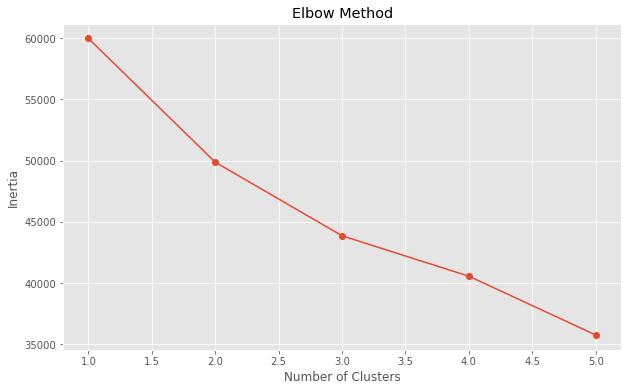

In [12]:
inertia = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=5, random_state=42)
    kmeans.fit(scaled_data[numerical_features])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1,6), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [13]:
means = KMeans(n_clusters=3, init='k-means++', n_init=9, random_state=42)
kmeans.fit(scaled_data[numerical_features])

df['cluster'] = kmeans.labels_

cluster_distribution = df['cluster'].value_counts().sort_index()
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numerical_features)

cluster_distribution, cluster_centers

(0    2173
 1    2391
 2     843
 3     589
 4       2
 Name: cluster, dtype: int64,
          age  total_sessions  total_flights_booked  total_hotels_booked  \
 0  43.320165        8.009646              3.476803             3.499311   
 1  38.049832        8.045226              1.034757             1.250000   
 2  44.060570        9.149644              2.572447             2.707838   
 3  39.886248        8.220713              3.585739             3.455008   
 4  19.500000        8.000000              1.000000             0.500000   
 
    total_cancellations  average_flight_discount  avg_hotel_discount  \
 0         4.440892e-16                 0.105933            0.126314   
 1         1.675042e-03                 0.111220            0.127175   
 2         1.306413e-02                 0.115738            0.128371   
 3         1.010187e+00                 0.104938            0.243667   
 4         0.000000e+00                 0.231667            0.000000   
 
    total_checked_bags 

In [14]:
df.head()

,user_id,age,gender,married,has_children,total_sessions,total_flights_booked,total_hotels_booked,total_cancellations,average_flight_discount,discount_flight_proportion,avg_hotel_discount,avg_base_fare_usd,scaled_ads_per_km,total_checked_bags,cluster
0,23557,64,F,1,0,8,0,2,0,0.000,0.000,0.250,0.000,0.000041,0.0,1
1,94883,51,F,1,0,8,2,2,0,0.000,0.000,0.125,432.045,0.000041,1.0,1
2,101486,50,F,1,1,8,1,2,0,0.075,0.250,0.000,189.910,0.000151,0.0,1
3,101961,42,F,1,0,8,5,5,0,0.150,0.250,0.125,248.532,0.000044,2.0,0
4,106907,44,F,1,1,8,2,2,1,0.000,0.125,0.125,13902.060,0.000041,10.0,3


In [15]:
def assign_perk(cluster_id):
    if cluster_id == 0:
        return '1 night free with flight'
    elif cluster_id == 1:
        return 'Exclusive discounts'
    elif cluster_id == 2:
        return 'No Cancellation Fees'
    elif cluster_id == 3:
        return 'free cheked bag'
    elif cluster_id == 4:
        return 'free hotel meal'

df['perk'] = df['cluster'].apply(assign_perk)

In [16]:
df[['user_id', 'cluster', 'perk']]

,user_id,cluster,perk
0,23557,1,Exclusive discounts
1,94883,1,Exclusive discounts
2,101486,1,Exclusive discounts
3,101961,0,1 night free with flight
4,106907,3,free cheked bag
...,...,...,...
5993,792549,0,1 night free with flight
5994,796032,3,free cheked bag
5995,801660,0,1 night free with flight
5996,811077,1,Exclusive discounts


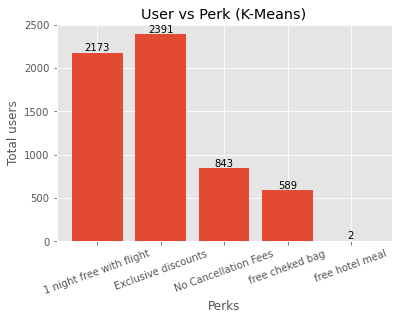

In [17]:
grouped = df.groupby('perk').size().reset_index(name='Count')

plt.bar(grouped['perk'], grouped['Count'])
plt.xlabel('Perks')
plt.ylabel('Total users')
plt.title('User vs Perk (K-Means)')
plt.xticks(rotation=20)

for i, value in enumerate(grouped['Count']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

    
plt.show()
